In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1500)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [10]:
# 1.导入数据

In [3]:
num_words = 30000
maxlen = 200
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000,)   (25000,)
(25000,)   (25000,)
(25000, 200)   (25000,)
(25000, 200)   (25000,)


In [12]:
# 1.LSTM
# #

In [13]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 136       
Total params: 968,456
Trainable params: 968,456
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 431s 19ms/sample - loss: 0.6619 - accuracy: 0.5926 - val_loss: 0.6654 - val_accuracy: 0.5828
Epoch 2/5
22500/22500 [==============================] - 425s 19ms/sample - loss: 0.4929 - accuracy: 0.7723 - val_loss: 0.4327 - val_accuracy: 0.8276
Epoch 3/5
22500/22500 [==============================] - 417s 19ms/sample - loss: 0.3680 - accuracy: 0.8671 - val_loss: 0.4194 - val_accuracy: 0.8368
Epoch 4/5
22500/22500 [==============================] - 417s 19ms/sample - loss: 0.3418 - accuracy: 0.8788 - val_loss: 0.5165 - val_accuracy: 0.8216
Epoch 5/5
22500/22500 [==============================] - 421s 19ms/sample - loss: 0.4069 - accuracy: 0.8110 - val_loss: 0.6254 - val_accuracy: 0.6020
CPU times: user 1h 13min 1s, sys: 7min 28s, total: 1h 20min 29s
Wall time: 35min 13s


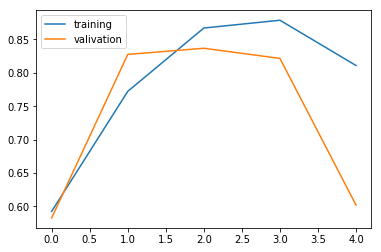

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [17]:
# 3.GRU

In [4]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.GRU(32, return_sequences=True),
        layers.GRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           960000    
_________________________________________________________________
gru (GRU)                    (None, 200, 32)           6336      
_________________________________________________________________
gru_1 (GRU)                  (None, 1)                 105       
Total params: 966,441
Trainable params: 966,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)


W0712 04:45:40.648287 140495283443456 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
20096/22500 [=========================>....] - ETA: 1:10 - loss: 0.6669 - accuracy: 0.5629

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()